<h1><center>EDA Notebook</center></h1>

ABSTRACT: The following notebook documents the EDA work for our selected dataset. It includes the overarching patterns, insights, and questions generated through a careful analysis of the selected data and its numerous components. Furthermore, it documents our consideration of the data and its possible implications on our working model.  

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/data.csv', delimiter=',', encoding='utf-8')

In [4]:
#Adds four new columns to our dataframe for potential analysis/use. 

#Measures the length of a novel's title 
df['title_length'] = df.title.apply(len)
#Measures the length of a novel's summary 
df['summary_length'] = df.summary.apply(len)
#Denotes whether copies of a novel's title exists in the dataset. (Can be used to count the number of duplicates)
df['title_duplicates'] = df.title.duplicated()
#Denotes whether copies of a novel's summary exists in the dataset. (Can be used to count the number of duplicates)
df['summery_duplicates'] = df.summary.duplicated()

In [5]:
df.shape

(4657, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               4657 non-null   int64 
 1   title               4657 non-null   object
 2   genre               4657 non-null   object
 3   summary             4657 non-null   object
 4   title_length        4657 non-null   int64 
 5   summary_length      4657 non-null   int64 
 6   title_duplicates    4657 non-null   bool  
 7   summery_duplicates  4657 non-null   bool  
dtypes: bool(2), int64(3), object(3)
memory usage: 227.5+ KB


In [7]:
df.columns

Index(['index', 'title', 'genre', 'summary', 'title_length', 'summary_length',
       'title_duplicates', 'summery_duplicates'],
      dtype='object')

In [8]:
df.title.describe()

count          4657
unique         4296
top       Bloodline
freq              4
Name: title, dtype: object

In [9]:
duplicate_titles = df.groupby('title').count()['title_duplicates'].sort_values(ascending=False)
duplicate_titles


title
The Hunger Games         4
Nemesis                  4
Bloodline                4
Annihilation             3
Broken                   3
                        ..
King Rat                 1
King Solomon's Carpet    1
King of Foxes            1
King of Scars            1
’Salem's Lot             1
Name: title_duplicates, Length: 4296, dtype: int64

In [10]:
duplicates_of_4 = len([count for count in duplicate_titles if count == 4])
duplicates_of_3 = len([count for count in duplicate_titles if count == 3])
duplicates_of_2 = len([count for count in duplicate_titles if count == 2])

In [11]:
print(f"Number of titles with 4 duplicates: {duplicates_of_4}")
print(f"Number of titles with 3 duplicates: {duplicates_of_3}")
print(f"Number of titles with 2 duplicates: {duplicates_of_2}")

Number of titles with 4 duplicates: 3
Number of titles with 3 duplicates: 36
Number of titles with 2 duplicates: 280


In [12]:
duplicated_rows = df.duplicated(keep=False)
df[duplicated_rows]

,index,title,genre,summary,title_length,summary_length,title_duplicates,summery_duplicates


Observations: 

(1) The data does not contain solely unique entries for the title of its novels, specifically, there exist 361 title duplicates. Moreover, these duplicate entries are not necessarily identical. For example, the title "Hunger Games" appears 4 times in the data set. However, 3 of these entries provide the same cited summaries, while 1 appears to be a much lengthier version detailing the entire events of the novel. Addtionally, the genre descriptions of the duplicated entries also differ despite the fact that most shared the same cited summary. In total, "Hunger Games" was labelled as a science, romance, and fantasy centered novel.

(2) Most duplicate titles are only duplicated once, with a few (although not insignificant amount) being duplicated twice or three times. 

(3) The most commonly duplicated titles consist of only one (arguable common occuring) word, such as "Broken", "Bloodline", or "Annihiliation". 

Confusions: 

(1) The above observations about our chosen dataset demand significant considerations. Namely, we'll have to decide the merits and demerits of processing (i.e. removing) the duplicated data. Normally, we would simply remove any duplicates before using the data in our model. However, these "duplicates" are not true copies. From our investigation, each is slighlty unique from the others. For example, despite having the same summary, different entries will categorize the novel under two different labels. In fact, we discovered that there do not exist any completely identical row entires. Therefore, we have decided to leave the foundational data (i.e. columns that we did not create or extract) largely unprocessed. However, this does mean that the specific objective of our model will have to change. Instead of trying to correctly identify the most likely genre of a novel, we will emphasis that the model will simply attempt to provide a "correct" (but not wholly representative) labelling of the novel. 

In [13]:
df.summary.describe()

count                                                  4657
unique                                                 4542
top       The incredible true story of the women who fou...
freq                                                      3
Name: summary, dtype: object

Observations:

(1) Similar to the title column, there appears to be duplicated summaries. However, it's worth noting that the number of duplicates among the titles and summaries vastly differ, with there being only 115 duplicate summaries. This seems to suggest that a portion of duplicated titles could be conicidences. Namely, it could be the case that multiple, different novels just so happen to share the same title. In fact, after some investigation, it appears that this assumption is correct (at least for certain entries). For example, the title "Bloodline" has 4 total entries. However, each is for a separate novel. The same is true for the title "Nemesis". 


In [14]:
df.genre.describe()

count         4657
unique          10
top       thriller
freq          1023
Name: genre, dtype: object

In [15]:
df.genre.value_counts().describe()

count      10.000000
mean      465.700000
std       345.779329
min       100.000000
25%       102.750000
50%       550.000000
75%       635.250000
max      1023.000000
Name: genre, dtype: float64

<Axes: >

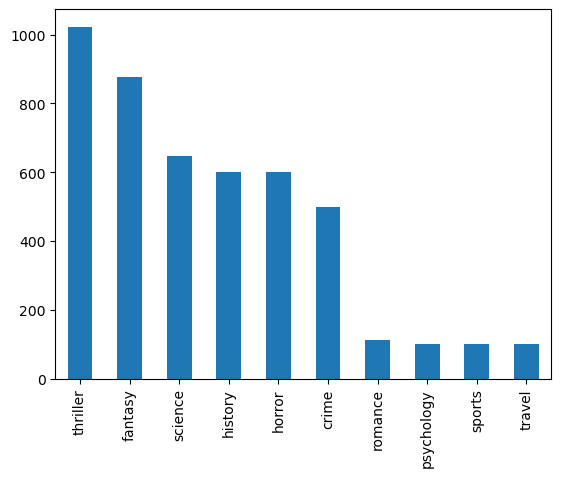

In [16]:
df.genre.value_counts().plot(kind='bar')

Observations:

(1) Thriller is the most commonly occuring genre included in the data set, while travel is the rarest. 

(2) The distribution of the genres appear to be grouped into 3 primary concentrations, i.e., {thriller, fantasy}, {science, history, horror, crime}, and {romance, psychology, sports, travel}. Moreover, these concentrations significantly differ in their frequency, with the standard deviation between the frequency of all genres being 345.77. 

(3) The least represented genres are mostly compromised of non-fiction categories like psychology, sports, and travel, which may introduce an additional layer of difference between them and other genres. 

(4) The most popular genres appear to very broadily defined, such as thriller which can be seen as having many overlapping qualities with fantasy and science. 

Questions: 

(1) The genres themselves do not appear to be very well-defined. For instance, do the genres of science and history contain a mixture of both fiction and non-fiction, or are they only inclusive towards one? (EDIT: There appears to be a mixture)

(2) The dataset used was constructed by webscraping the website Good Reads. However, due to the limited number of genres included in the dataset (at least when compared to the vast number listed on Good Reads), this implies that these genres were specifically and intentionally selected. Although not explicitly stated by the author of this dataset, we assume that the included genres consist of what the author believed to be the most comprehensive.   

Implications: 

(1) Because there exist significant differences in the genre distribution of our data, we believe our model will be biased towards particular genres similar to the model developed in class. More specifically, we believe that our model will be biased towards the higher occuring genres of thriller and fantasy. Conversely, for the less frequent genres of travel, sports, and psychology, we expect for there to be minimal confusion/bias. If this does appear to be true during our model, it might consititute the need to artifically including more data to even out the distribution of the genres which will hopefully improve the overall accuracy of the model. 

(2) Because the distribution of genres are largely similar among certain groups, the accuracy of our model could follow such a pattern. 

In [17]:
df.title_length.describe()

count    4657.000000
mean       19.323169
std        14.596025
min         2.000000
25%        12.000000
50%        16.000000
75%        21.000000
max       166.000000
Name: title_length, dtype: float64

<Axes: >

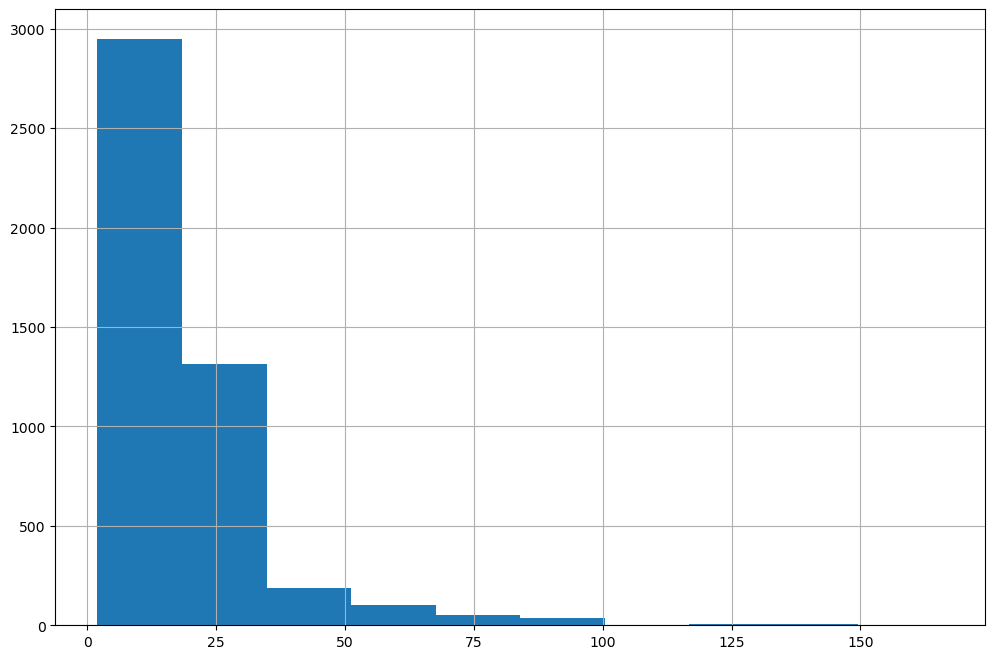

In [18]:
df.title_length.hist(
    figsize=(12, 8)
)

Observations:

(1) The distribution of title lengths is generally centered around 0-25 characterss, with the overall mean being 19.3.

(2) Relative to the mean, the standard devation (14.6) is rather high, especially since 75% of the title lengths fall below 21 characters. This seems to indicate that that there are multiple outliers skewing the data towards larger results, which is visually supported by the generated histogram. 

(3) The max title length is a definitive outlier at 166 characters. As such, it's (and other lengthy title entries') exclusion should be considered. However, it should first be evaluated whether certain genres have a pattern of possessing these longer titles, as excluding them under such a situation could one-sidedly affect the accuracy of predicting certain genres. 

Questions: 

(1) Will the length of a novel's title impact the accuracy of our model? And if so, how? Would the inclusion of longer titles provide more data to be analyzed or simply repeat and dilute information already present in the summary? 

Implications: 

(1) It's possible that the length of a novel's title will have an impact on our model's prediction accuracy (whether positive, negative, or confounding). As such, to eliminate an additional variable within our model's consideration (and thus consolidate its results), it might be necessary to somehow induce a more centralized distribution of the title lengths  - either through the removal or inclusion of certain data. However, this would most likely overfit our model and make it less applicable to our desired use cases. 

In [19]:
df.summary_length.describe()

count     4657.000000
mean      2106.322311
std       2525.855854
min         11.000000
25%        699.000000
50%       1141.000000
75%       2562.000000
max      31263.000000
Name: summary_length, dtype: float64

<Axes: >

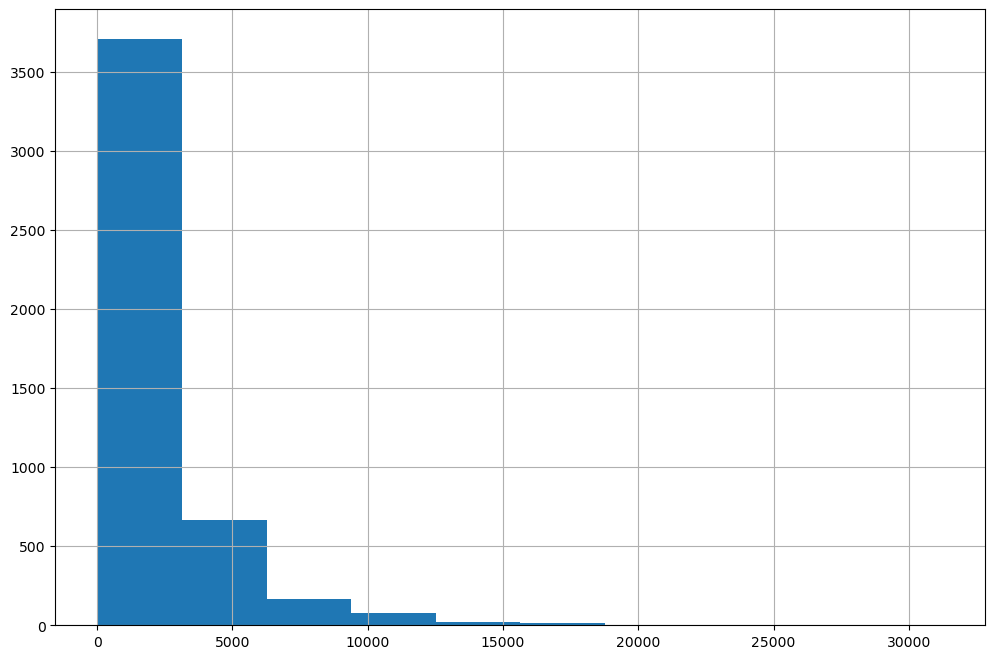

In [20]:
df.summary_length.hist(
    figsize=(12, 8)
)

Observations: 

(1) Similar to the length of the titles, the length of the summaries are skewed towards the right. Specifically, the mean length is 2106.32 characters while the standard deviation is 2525.85 characters, with 75% of the summary lengths falling below 2562 characters (indicating the skewed nature of the data). As such, many of the implications are consistent with those discussed regarding the title lengths. However, it's worth noting that the summary lengths, although skewed, are less so than the title lengths. 

Questions: 

(1) Retrospectively, it may have been a wiser choice to select data that utilized more consistent standards for the summary entries. For example, instead of utilizing data from Good Reads (which largely consists of contributions from users), official book summaries or "blurbs" that often come with novels could have been used as they are generally of a certain length, compact, and designed to be representative of their novel. 